In [1]:
!pip install folium



   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium # pip install folium

# Load the dataset
df = pd.read_csv('Dataset .csv')

# Check for correct coordinates
print(df[['Latitude', 'Longitude']].describe())

          Latitude    Longitude
count  9551.000000  9551.000000
mean     25.854381    64.126574
std      11.007935    41.467058
min     -41.330428  -157.948486
25%      28.478713    77.081343
50%      28.570469    77.191964
75%      28.642758    77.282006
max      55.976980   174.832089


In [3]:
def create_map(city_name=None):
    # Filter by city if provided, otherwise use a sample of 1000 to avoid freezing
    if city_name:
        subset = df[df['City'] == city_name]
    else:
        subset = df.sample(min(1000, len(df)))

    # Create a base map centered on the average location
    center_lat = subset['Latitude'].mean()
    center_long = subset['Longitude'].mean()
    
    m = folium.Map(location=[center_lat, center_long], zoom_start=12)

    # Add markers for each restaurant
    for _, row in subset.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Restaurant Name']} ({row['Aggregate rating']}⭐)",
            icon=folium.Icon(color='blue' if row['Aggregate rating'] >= 4.0 else 'red')
        ).add_to(m)
        
    return m

# Create a map for a specific city (e.g., New Delhi or the city with most data)
# Note: In Jupyter, just typing the variable name displays the map
map_view = create_map("New Delhi")
map_view

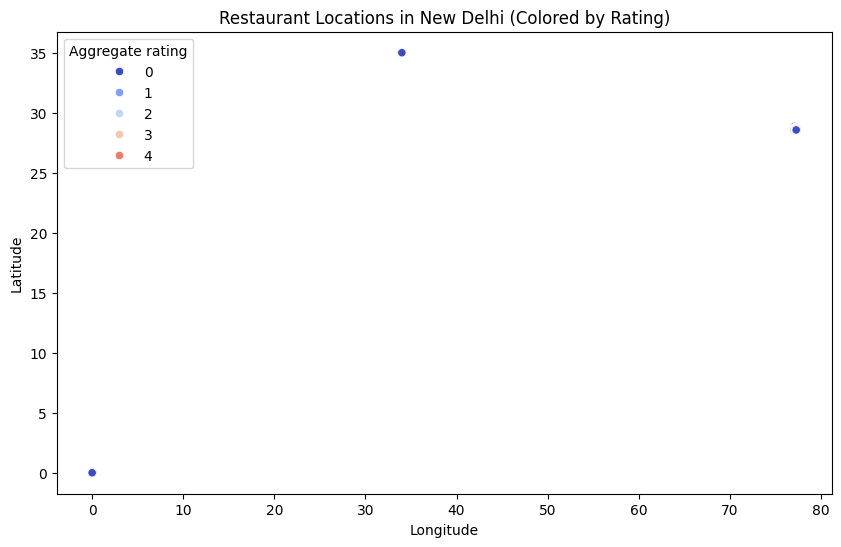

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df[df['City'] == 'New Delhi'], palette='coolwarm')
plt.title('Restaurant Locations in New Delhi (Colored by Rating)')
plt.show()

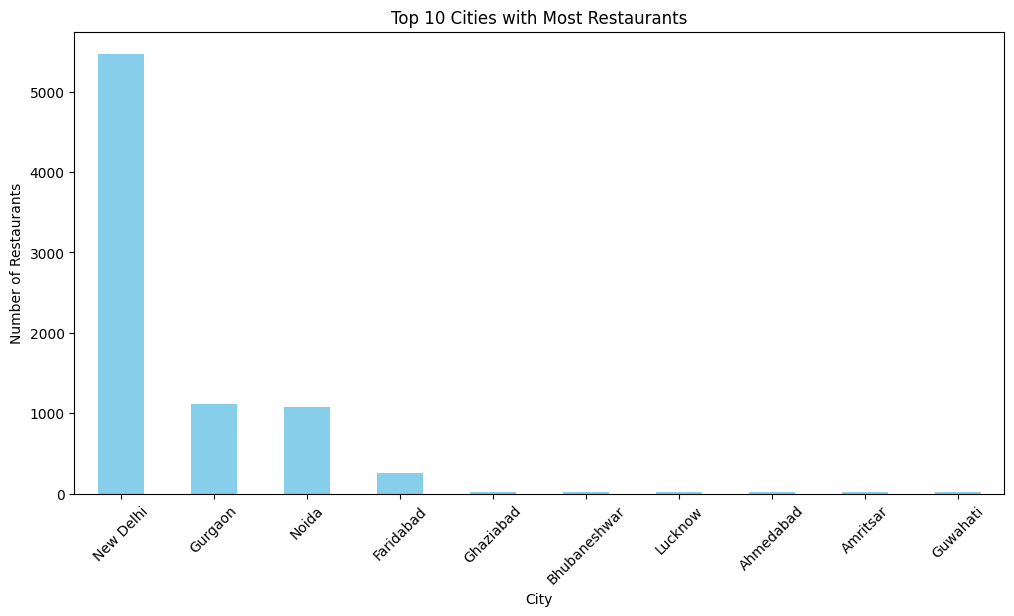

In [5]:
# 1. Count restaurants per city
city_counts = df['City'].value_counts()
plt.figure(figsize=(12, 6))
city_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Group by City and calculate averages
city_stats = df.groupby('City')[['Aggregate rating', 'Average Cost for two', 'Votes']].mean()

# 1. Cities with Highest Average Ratings
print("--- Top 5 Cities by Average Rating ---")
print(city_stats.sort_values(by='Aggregate rating', ascending=False).head(5))

# 2. Most Expensive Cities (by Average Cost)
print("\n--- Top 5 Most Expensive Cities ---")
print(city_stats.sort_values(by='Average Cost for two', ascending=False).head(5))

--- Top 5 Cities by Average Rating ---
                  Aggregate rating  Average Cost for two       Votes
City                                                                
Inner City                4.900000           1120.000000  317.500000
Quezon City               4.800000            800.000000  294.000000
Makati City               4.650000           1150.000000  452.500000
Pasig City                4.633333            933.333333  696.666667
Mandaluyong City          4.625000           2000.000000  300.000000

--- Top 5 Most Expensive Cities ---
            Aggregate rating  Average Cost for two      Votes
City                                                         
Jakarta             4.356250         308437.500000   742.6875
Tangerang           4.300000         250000.000000  1183.5000
Bogor               3.850000         160000.000000   971.0000
Bandung             4.200000         150000.000000    22.0000
Pasay City          4.366667           3333.333333   606.0000
